# **Práctica 5: Test de Kolmogorov-Smirnov**

<hr>

**[1] Nom: Izan Garrido Dorado

**[1] NIU: 1704520

**[1] mail (gmail): izanraptor@gmail.com

<hr>

**[2] Nom: Pablo López Fiol

**[2] NIU: 1706501

**[2] mail (gmail): pablolopezfiol10@gmail.com

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr5_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr5_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr5_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr5_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

# **Context**

Considera una mostra de 200 mesures, que segueix una distribució Alpha (valors a la caixa de codi). La distribució Alpha és una distribució $f(x,a)$, contínua en $x>0$ que depèn d'un paràmetre $a>0$. Consulta la documentació de la distribució a la documentació de Scipy: [+info](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alpha.html#scipy.stats.alpha)

Anem a utilitzar un mètode de Kolmogorov-Smirnov per calcular la $a_{òptima}$, la que millor s'ajusta a la distribució de probabilitat de la mostra.

En aquesta pràctica calcularem la $a_{òptima}$ utilitzant la funció cumulativa de la teva mostra i comparant-la amb diferents funcions cumulatives de test. Considerarem 1000 passos equidistants entre $a_{inf}$=4 i $a_{sup}$=6. En aquest cas, per a cada valor $x_i$ de la teva mostra, la funció cumulativa t'incrementa en un factor 1/200, i queda fixada, de manera similar al que vam veure a la pràctica anterior.

Per a cada punt de la teva mostra pots calcular la diferència de la funció cumulativa de la teva mostra amb el valor cumulatiu que obtens amb la funció de test en aquell mateix punt, aplicant un pes i fent una suma cumulativa de diferències o distàncies (al test de KS més comú s'empra el valor de desviació màxima). El que farem serà, per a cada punt d'avaluació, multiplicarem la distància pel valor de la pdf en aquell punt (perquè pesin més els valors més probables), i sumarem tots els valors absoluts de distàncies que evaluïs per a cada punt, així es promedien totes les diferències.

La funció de test que millor s'ajusta és aquella que està 'més' a prop de la teva funció cumulativa de mostra d'acord amb aquesta distància cumulativa ponderada, que anomenarem $d_{KS}$. Per a totes les teves variacions, el $a_{òptim}$ serà aquell que minimitza aquest valor de $d_{KS}$.

Per a un determinat $a_i$ el valor de $d_{KS_i}$ no és més que:

$$
d_{KS_i} = \sum_{n=1}^{200}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) | · PDF_{Alpha}(x_n,a_i) )
$$

Al test de KS més comú s'empra el valor de desviació màxima, que és:

$$
d_{max,i} = \max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) |)
$$

In [ ]:
m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]

### <font color='orange'>**> Python #1**</font>

Segons la descripció del problema, sabem que el valor òptim de $a$ es troba entre 4 i 6.

Dibuixa la gràfica de la funció cumulativa de la mostra, i la funció cumulativa de la distribució Alpha per a tres valors de a: 4, 5, i 6.

A vista ja veiem que si $a=5$ tenim la situació que resembla millor les dades cumulatives... No és l'òptim, però s'assembla bastant!

a_estimat= 4.948948948948949


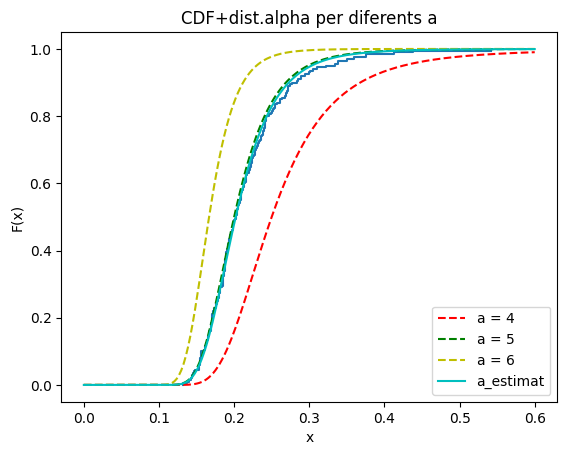

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]


m.sort()
n = len(m)
#cdf = np.arange(1, n+1) / n

CDF_Exp=[]
for i in m:
  CDF_Exp.append(m.index(i)/n)
plt.step(m, CDF_Exp)
plt.title("CDF empírica")

x=np.linspace(0, 0.6, 200)
a_4=stats.alpha.cdf(x, 4)
a_5=stats.alpha.cdf(x,5)
a_6=stats.alpha.cdf(x,6)
plt.plot(x, a_4, color="r", label="a = 4", ls="--")
plt.plot(x, a_5, color="g", label="a = 5", ls="--")
plt.plot(x, a_6, color="y", label="a = 6", ls="--")
plt.plot(x,stats.alpha.cdf(x,4.948), color="c", label="a_estimat")
plt.legend(loc="lower right")
plt.title("CDF+dist.alpha per diferents a")
plt.ylabel("F(x)")
plt.xlabel("x")

#Se aprecia como a=5 es el valor de a para el qual la distribución alpha es
#más parecida a la distribución muestra m dada

def cdf(x, m_cualquiera):
  x_valid=[]
  for i in m_cualquiera:
    if i<=x:
      x_valid.append(i)
  return(len(x_valid)/len(m_cualquiera))

def d_KSi(muestra, a):
  n_s=[]
  for x_n in muestra:
    n_s.append((np.abs(cdf(x_n, muestra)-stats.alpha.cdf(x_n, a)))*stats.alpha.pdf(x_n, a))
  return(sum(n_s))

valors_a=np.linspace(4,6,1000)

def a_optim(llista_as, mostra):
  d_i=[]
  for a_i in llista_as:
    d_i.append(d_KSi(mostra, a_i))
  return(llista_as[np.argmin(d_i)])

a_estimat=a_optim(valors_a, m)
print("a_estimat=",a_estimat)

### <font color='green'>**> Entrega #1**</font>

Implementa una funció que evalui el valor de $d_{KS_i}$ per a un determinat $a_i$, i evalua $d_{KS_i}$ per $a=4$, $a=5$, i $a=6$. A aquesta funció se li ha de passar els valors ordenats de $m$ i el valor de $a$ de test. Com veiem, el valor de $d_{KS}$ és el menor per $a=5$. **[2 punts]**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]

def cdf(x, m_cualquiera):    #He definit la cdf per un valor x de una llista m qualsevol
  x_valid=[]                 #Tal i com esta definida no necessariament ha d'estar ordenada
  for i in m_cualquiera:
    if i<=x:
      x_valid.append(i)
  return(len(x_valid)/len(m_cualquiera))


def d_KSi(muestra, a):       #Definim una d_KSi amb la fòrmula donada a l'enunciat utilitzant
  n_s=[]                     #la CDF previament definida. Se li dona una mostra i un valor de a i ens retorna dKSi
  for x_n in muestra:
    n_s.append((np.abs(cdf(x_n, muestra)-stats.alpha.cdf(x_n, a)))*stats.alpha.pdf(x_n, a))
  return(sum(n_s))

print("a_4=", d_KSi(m, 4))
print("a_5=", d_KSi(m, 5))
print("a_6=", d_KSi(m, 6))

# J. Flix: 2/2

a_4= 261.644766092457
a_5= 23.482323416278334
a_6= 418.5780904885421


### <font color='green'>**> Entrega #2**</font>

Fes servir la funció que has creat i fes una gràfica dels valors $d_{KS}$ en el rang [$a_{inf}$,$a_{sup}$] i avalua quin és l’$a_{òptim}$ (el que minimitza la funció $d_{KS}$). **[4 punts]**

a_estimat= 4.948948948948949


Text(0.5, 1.0, 'dKS(a) vs a')

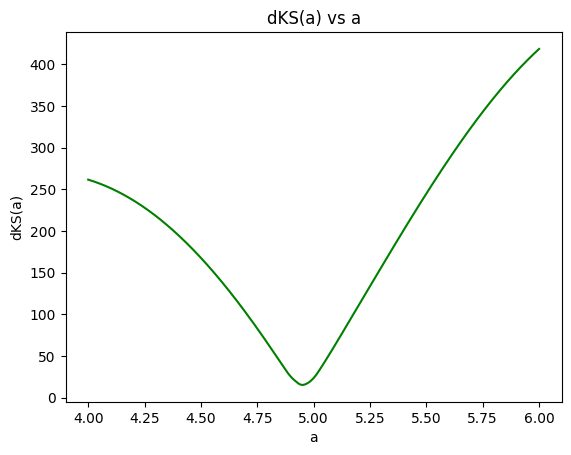

In [ ]:
valors_a=np.linspace(4,6,1000)


d_i=[]            #valors de dKS per cada a_i
for a_i in valors_a:
  d_i.append(d_KSi(m, a_i))

a_estimat=valors_a[np.argmin(d_i)]  #Valor de a optim estimat
print("a_estimat=",a_estimat)

plt.plot(valors_a, d_i, color="g")
plt.ylabel("dKS(a)")
plt.xlabel("a")
plt.title("dKS(a) vs a")

# J. Flix: 4/4

### <font color='green'>**> Entrega #3**</font>

Quin sería $a_{òptim}$ si haguèssis fet servir el mètode estàndard de KS, és a dir el que evalua $d_{KS}$ com el màxim de la diferència entre la mostra i la CDF:

$$
d_{max,i} = \max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) |)
$$

Implementa una funció per a $d_{max,i}$ i procedeix com a l'apartat anterior, calcula $a_{òptim}$ amb aquest mètode.

**[2 punts]**

a_estimat= 4.956956956956957


Text(0.5, 1.0, 'dmax(a) vs a')

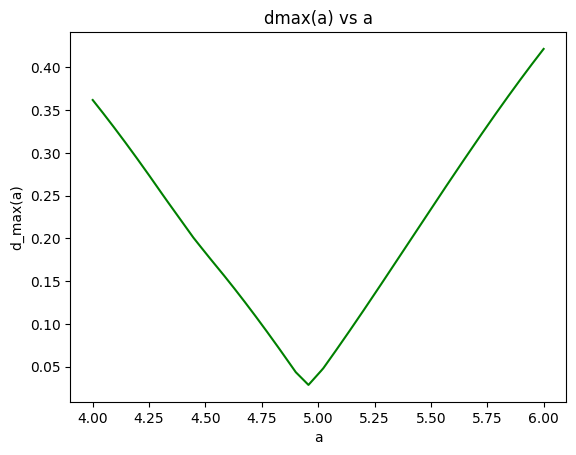

In [ ]:
def d_maxi(muestra, a):       #Definim una d_maxi amb la fòrmula Kolmogorov estandard utilitzant
  n_m=[]                     #la CDF previament definida. Se li dona una mostra i un valor de a i ens retorna dmax
  for x_m in muestra:
    n_m.append(np.abs(cdf(x_m, muestra)-stats.alpha.cdf(x_m, a)))
  return(max(n_m))

d_i_2=[]            #valors de dmax per cada a_i
for a_i in valors_a:
  d_i_2.append(d_maxi(m, a_i))

a_estimat_est=valors_a[np.argmin(d_i_2)]  #Valor de a optim estimat Kolmogorov estandard
print("a_estimat=", a_estimat)

plt.plot(valors_a, d_i_2, color="g")
plt.ylabel("d_max(a)")
plt.xlabel("a")
plt.title("dmax(a) vs a")

# J. Flix: 2/2

### <font color='green'>**> Entrega #4**</font>

Dibuixa un histograma normalitzat de la mostra, i la funció de distribució de probabilitat Alpha que millor s'ajusta, aquella amb $a_{òptim}$. Com que els dos mètodes donen valors similars, utilitza el $a_{òptim}$ que resulta de l'apartat 2. **[2 punts]**

Text(0.5, 1.0, 'Mostra m i dist_alpha per a_optim')

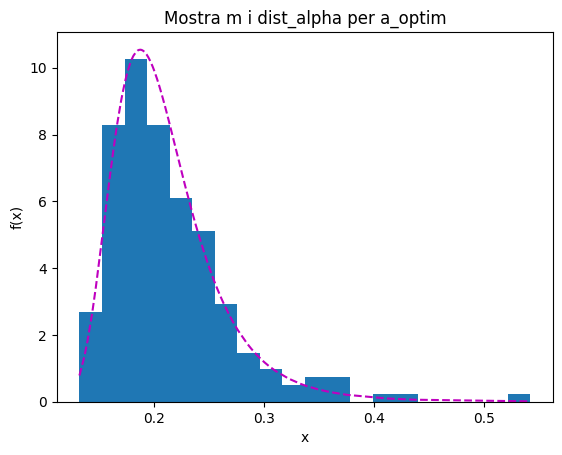

In [ ]:
plt.hist(m, bins=20, density="True")
dist_optima=stats.alpha.pdf(m, a_estimat)   #Distribución alpha pel valor òptim obtingut a l'apartat 2
plt.plot(m, dist_optima, "m--")
plt.ylabel("f(x)")     #Distribución probabilitat
plt.xlabel("x")
plt.title("Mostra m i dist_alpha per a_optim")

# J. Flix: 2/2

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr5_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr5_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr5_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr5_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>